# 2.6 PEG策略
PEG策略来源于彼得林奇的这句话：任何公司的定价如果合理的话，它的市盈率和收益增长率相等。

市盈率PE = 股价P / 每股收益率EPS，同时市盈率≈市值/净收益, 收益增长率G = (EPS_i - EPS_{i-1})/EPS_{i-1}

PEG = PE/(G * 100)

可以把PEG看作一个指标，PEG越低代表股价被低估的可能性越大，股票会涨的可能性越大。PEG估值法适合应用于成长型公司。

In [ ]:
def initialize(context):
    set_benchmark('000300.XSHG')
    set_option('use_real_price', True)
    set_order_cost(OrderCost(open_tax=0, close_tax=0.001, \
    open_commission=0.0003, close_commission=0.0003, \
    close_today_commission=0, min_commission=5),type='stock')
    
    g.security = get_index_stocks('000300.XSHG')
    g.N = 20
    g.q = query(valuation.code, valuation.pe_ratio, \
    indicator.inc_net_profit_year_on_year).filter(valuation.code.in_(g.security))
# valuation表里找code,和市盈率pe_ration
# indicator表里找净利润同比增长率inc_net_profit_year_on_year
# 详细的计算方式去api文档里查
    run_monthly(handle,1)
    

def handle(context):
    df = get_fundamentals(g.q)
    df = df[(df['pe_ratio']>0) & (df['inc_net_profit_year_on_year']>0)]
    df['peg'] = df['pe_ratio'] / df['inc_net_profit_year_on_year'] / 100
    df = df.sort_values('peg')
    to_hold = df['code'][:g.N].values
    
    for stock in context.portfolio.positions:
        if stock not in to_hold:
            order_target(stock,0)
    
    to_buy = [stock for stock in to_hold if stock not in context.portfolio.positions]
    
    if len(to_buy)>0:
        cash_per_stock = context.portfolio.available_cash / len(to_buy)
        for stock in to_buy:
            order_value(stock, cash_per_stock)
    


In [5]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

import numpy as np
import pandas as pd
data = pd.read_csv('/data/量化交易策略回测结果/2.6PEG策略.csv',encoding = 'ansi')
data.head()

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%)
0,2020-01-02 16:00:00,1.36,0.50,497.0,0.0,53223,0.0,-0.85
1,2020-01-03 16:00:00,1.18,0.50,0.0,0.0,0,0.0,-0.67
2,2020-01-06 16:00:00,0.80,0.70,205.0,0.0,0,0.0,-0.10
3,2020-01-07 16:00:00,1.55,1.57,872.0,0.0,0,0.0,0.02
4,2020-01-08 16:00:00,0.38,0.89,0.0,-683.0,0,0.0,0.51


In [6]:
data.tail()

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%)
238,2020-12-25 16:00:00,23.08,36.63,1384.6,0.0,0,0.0,11.01
239,2020-12-28 16:00:00,23.63,36.84,209.9,0.0,0,0.0,10.69
240,2020-12-29 16:00:00,23.10,36.26,0.0,-573.0,0,0.0,10.69
241,2020-12-30 16:00:00,24.83,36.66,395.4,0.0,0,0.0,9.48
242,2020-12-31 16:00:00,27.21,38.13,1467.1,0.0,0,0.0,8.58


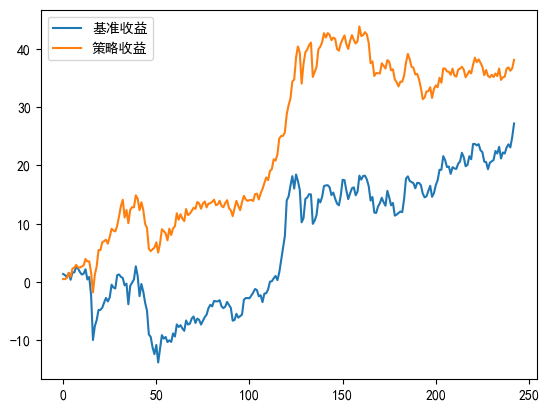

In [7]:
data[['基准收益', '策略收益']].plot()
plt.show()